In [1]:
import osmnx as ox

In [2]:
import geopandas as gpd

In [34]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [112]:
def get_bikeped_path(place_name):
    tags = {'highway': True}
    highway = ox.geometries_from_place(place_name, tags)
    seltypes = ['cycleway', 'footway', 'steps', 'pedestrian', 'residential', 'crossing', 'path', 'living_street', 'construction', 'track', 'services', 'service', 'bridleway']
    pedbike = highway[(highway.highway.isin(seltypes)) & (highway.type == 'LineString')]
    pedbike.loc[:, 'osmid'] = list(map(lambda x: x[1], list(pedbike.index)))
    pedbike.rename(columns = {'highway': 'path_type'}, inplace=True)
    pedbike.loc[:, 'city'] = place_name.split(',')[0]
    waygdf = pedbike[['osmid', 'path_type', 'city', 'geometry']]
    return waygdf

In [113]:
bikeped = get_bikeped_path(place_name="Eugene, OR, USA")

In [3]:
place_names = ["Eugene, OR, USA", "Springfield, OR, USA", "Coburg, OR, USA"]

In [120]:
bikepedlist = []

In [121]:
for place_name in place_names:
    bikepedlist.append(get_bikeped_path(place_name=place_name))

In [122]:
bikeped = pd.concat(bikepedlist)

In [124]:
type(bikeped)

geopandas.geodataframe.GeoDataFrame

In [126]:
bikeped.to_file(r'T:\DCProjects\Modeling\Sidewalk\data\bikeped_osm.shp', index=False)

Please ignore below lines

In [60]:
place_name = ["Eugene, OR, USA"]

In [70]:
place_name = ["Springfield, OR, USA"]

In [80]:
place_name = ["Coburg, OR, USA"]

In [94]:
place_name[0].split(',')[0]

'Coburg'

In [93]:
area = ox.geocode_to_gdf(place_names)

In [95]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-123.13062 44.12435, -123.1304...",44.132272,43.987529,-123.035886,-123.208758,298358072,relation,186706,44.050505,-123.095051,"Eugene, Lane County, Oregon, United States",boundary,administrative,0.788764
1,"MULTIPOLYGON (((-123.05014 44.05531, -123.0501...",44.094935,44.023536,-122.879054,-123.050143,298040144,relation,186721,44.046236,-123.022029,"Springfield, Lane County, Oregon, United States",boundary,administrative,0.672105
2,"POLYGON ((-123.07389 44.14244, -123.07324 44.1...",44.151722,44.126433,-123.048157,-123.073885,298038052,relation,186697,44.137628,-123.066200,"Coburg, Lane County, Oregon, 97408, United States",boundary,administrative,0.600880


In [7]:
type(area)

geopandas.geodataframe.GeoDataFrame

<Axes: >

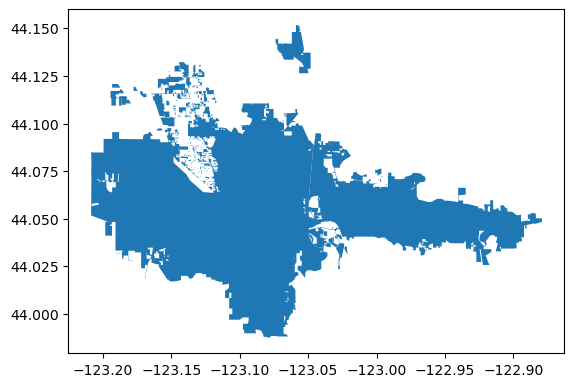

In [96]:
area.plot()

In [97]:
# List key-value pairs for tags
#tags = {'building': True}
# buildings = ox.geometries_from_place(place_name, tags)
# buildings.head()
tags = {'footway': True}
footway = ox.geometries_from_place(place_names, tags)

In [101]:
footway.columns

Index(['geometry'], dtype='object')

In [103]:
footway

,geometry


In [103]:
tags = {'highway': True}
highway = ox.geometries_from_place(place_names, tags)

In [10]:
selcols = ['highway','geometry','traffic_signals','crossing','bicycle','access','stop','direction','foot','cycleway','footway','sidewalk', 'lanes', 'construction']

In [11]:
# Eugene
list(highway.columns)

['highway',
 'geometry',
 'traffic_signals',
 'noref',
 'ref',
 'source',
 'noexit',
 'crossing',
 'bicycle',
 'access',
 'traffic_signals:direction',
 'note',
 'stop',
 'direction',
 'junction',
 'tiger:reviewed',
 'crossing:island',
 'tactile_paving',
 'traffic_calming',
 'foot',
 'horse',
 'motor_vehicle',
 'addr:state',
 'leisure',
 'name',
 'maxspeed',
 'traffic_sign',
 'traffic_sign:direction',
 'description',
 'distance',
 'inscription:en',
 'wheelchair',
 'bench',
 'bin',
 'bus',
 'covered',
 'network',
 'operator',
 'public_transport',
 'shelter',
 'description:en',
 'inscription',
 'kerb',
 'crossing_ref',
 'network:wikidata',
 'network:wikipedia',
 'flashing_lights',
 'cycleway',
 'noname',
 'button_operated',
 'man_made',
 'emergency',
 'level',
 'lit',
 'traffic_signals:sound',
 'traffic_signals:vibration',
 'route_ref',
 'departures_board',
 'seats',
 'brand',
 'brand:wikidata',
 'road_marking',
 'surface',
 'lamp_mount',
 'lamp_type',
 'direction:no_parking',
 'direction

In [100]:
highway.columns

Index(['highway', 'geometry', 'ref', 'crossing', 'direction', 'nodes',
       'service', 'tiger:cfcc', 'tiger:county', 'tiger:reviewed', 'name',
       'tiger:name_base', 'tiger:name_direction_prefix', 'name_1',
       'tiger:name_base_1', 'tiger:name_direction_prefix_1', 'surface',
       'alt_name', 'bicycle', 'tiger:name_type_1', 'maxspeed', 'cycleway:both',
       'bridge', 'layer', 'access', 'oneway', 'tiger:source', 'tiger:tlid',
       'tiger:upload_uuid', 'destination', 'hgv', 'lanes', 'maxheight',
       'maxspeed:hgv', 'official_name', 'junction:ref', 'comment',
       'cycleway:both:lane', 'brand', 'brand:wikidata', 'source',
       'lane_markings', 'tunnel'],
      dtype='object')

In [12]:
highway.type.unique()

array(['Point', 'LineString', 'Polygon', 'MultiPolygon'], dtype=object)

In [87]:
highway.highway.unique()

array(['turning_circle', 'traffic_signals', 'motorway_junction',
       'crossing', 'street_lamp', 'stop', 'service', 'residential',
       'secondary', 'tertiary', 'motorway_link', 'motorway', 'services',
       'cycleway', 'footway'], dtype=object)

In [88]:
seltypes = ['cycleway', 'footway', 'steps', 'pedestrian', 'residential', 'crossing', 'path', 'living_street', 'construction', 'track', 'services', 'service', 'bridleway']

In [104]:
pedbike = highway[(highway.highway.isin(seltypes)) & (highway.type == 'LineString')]

<Axes: >

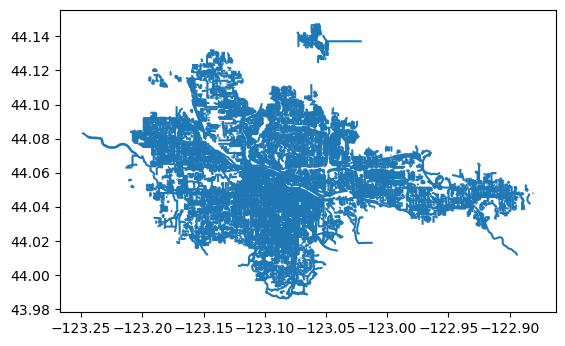

In [105]:
pedbike.plot()

In [107]:
'addr:city' in pedbike.columns

True

In [108]:
pedbike.shape

(21755, 293)

In [110]:
pedbike['addr:city']

element_type  osmid     
way           5453137       NaN
              5453138       NaN
              5453146       NaN
              5453147       NaN
              5453149       NaN
                           ... 
              1156423609    NaN
              1157113537    NaN
              1157122209    NaN
              1157122210    NaN
              1157122211    NaN
Name: addr:city, Length: 21755, dtype: object

In [76]:
pedbike.loc[:, 'osmid'] = list(map(lambda x: x[1], list(pedbike.index)))

In [77]:
pedbike.rename(columns = {'highway': 'path_type'}, inplace=True)

In [68]:
pedbike.loc[:, 'city'] = 'Eugene'

In [78]:
pedbike.loc[:, 'city'] = 'Springfield'

In [69]:
eugway = pedbike[['osmid', 'path_type', 'city', 'geometry']]

In [79]:
sprway = pedbike[['osmid', 'path_type', 'city', 'geometry']]

In [46]:
eugway.head(5)

osmid path_type  \
element_type osmid                        
way          5480179  5480179  cycleway   
             5484202  5484202  cycleway   
             5491163  5491163   footway   
             5496533  5496533   footway   
             5502270  5502270      path   

                                                               geometry  
element_type osmid                                                       
way          5480179  LINESTRING (-123.16057 44.07346, -123.16056 44...  
             5484202  LINESTRING (-123.11502 44.09149, -123.11500 44...  
             5491163  LINESTRING (-123.10639 44.05717, -123.10640 44...  
             5496533  LINESTRING (-123.06732 44.00403, -123.06735 44...  
             5502270  LINESTRING (-123.18821 44.05854, -123.18820 44...

In [15]:
highway.highway.unique()

array(['traffic_signals', 'turning_circle', 'turning_loop',
       'motorway_junction', 'crossing', 'stop', 'mini_roundabout',
       'milestone', 'bus_stop', 'trailhead', 'passing_place', 'give_way',
       'services', 'street_lamp', 'motorway_junction ref=12',
       'residential', 'service', 'tertiary', 'motorway_link', 'motorway',
       'secondary_link', 'primary', 'secondary', 'primary_link',
       'cycleway', 'unclassified', 'footway', 'path', 'tertiary_link',
       'trunk', 'steps', 'pedestrian', 'busway', 'living_street',
       'construction', 'track', 'trunk_link', 'proposed', 'platform'],
      dtype=object)

In [104]:
#highway[(highway.sidewalk != 'no') & (highway.type =='LineString')].plot() #(~highway.sidewalk.isnull()), (highway.type !='Point')

In [55]:
highway.sidewalk.unique()

array([nan, 'no', 'both', 'right', 'left', 'separate', 'yes'],
      dtype=object)

In [56]:
highway.footway.unique()

array([nan, 'sidewalk', 'crossing', 'access_aisle'], dtype=object)

In [58]:
highway.foot.unique()

array([nan, 'private', 'yes', 'designated', 'permissive', 'no',
       'destination'], dtype=object)

In [59]:
highway.access.unique()

array([nan, 'private', 'yes', 'no', 'destination', 'agricultural',
       'permissive', 'customers'], dtype=object)

In [63]:
highway.highway.unique()

array(['traffic_signals', 'turning_circle', 'turning_loop',
       'motorway_junction', 'crossing', 'stop', 'mini_roundabout',
       'milestone', 'bus_stop', 'trailhead', 'passing_place', 'give_way',
       'services', 'street_lamp', 'motorway_junction ref=12',
       'residential', 'service', 'tertiary', 'motorway_link', 'motorway',
       'secondary_link', 'primary', 'secondary', 'primary_link',
       'cycleway', 'unclassified', 'footway', 'path', 'tertiary_link',
       'trunk', 'steps', 'pedestrian', 'busway', 'living_street',
       'construction', 'track', 'trunk_link', 'proposed', 'platform'],
      dtype=object)

In [60]:
sel = (highway.highway=='path') & (highway.bicycle=='designated') & (highway.foot=='designated') & (highway.footway == 'sidewalk')

<Axes: >

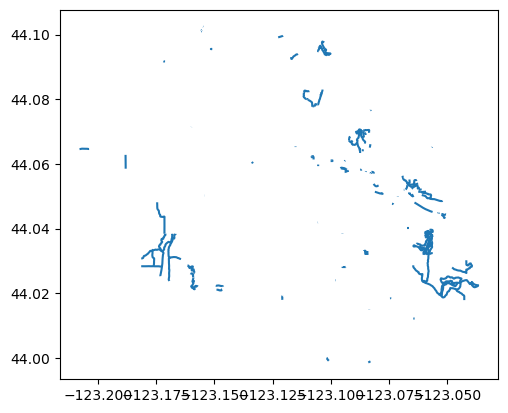

In [65]:
highway[highway.highway=='path'].plot()

<Axes: >

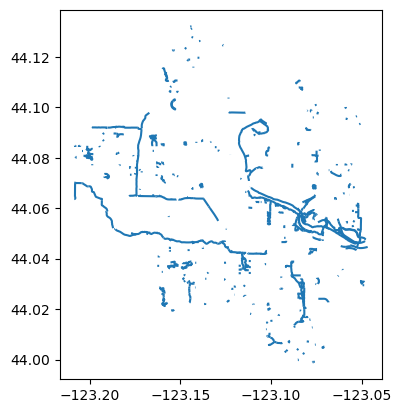

In [64]:
highway[highway.foot=='designated'].plot()

<Axes: >

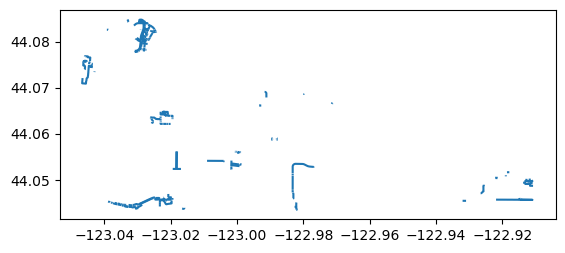

In [91]:
highway[highway.footway == 'sidewalk'].plot()

In [87]:
df = highway[(highway.type =='LineString')][selcols] #(highway.sidewalk != 'no') & 

In [88]:
df.rename(columns={'traffic_signals': 't_signals', 'construction': 'construct'}, inplace=True)

In [89]:
df.to_file('T:/DCProjects/Modeling/Sidewalk/temp/osm_highway_SPR.shp')  

C:\Users\clid1852\AppData\Local\Temp\ipykernel_1200\3232305796.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('T:/DCProjects/Modeling/Sidewalk/temp/osm_highway_SPR.shp')


In [10]:
buildings  = buildings.loc[buildings.geom_type == 'Polygon', buildings.columns.str.contains('addr:|geometry')]

In [11]:
buildings.columns = buildings.columns.str.replace("addr:", "")

In [12]:
buildings.rename(columns={'housenumber': 'houseNo'}, inplace=True)

In [13]:
buildings.columns

Index(['state', 'geometry', 'city', 'country', 'houseNo', 'postcode',
       'street'],
      dtype='object')

In [14]:
# Save footprints 
buildings.to_file('T:/DCProjects/Modeling/Sidewalk/temp/edgewood_buildings.shp')  
# Or save in a more open source format
#buildings.to_file('../temp/edgewood_buildings.geojson', driver='GeoJSON')  

C:\Users\clid1852\AppData\Local\Temp\ipykernel_1200\759818116.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings.to_file('T:/DCProjects/Modeling/Sidewalk/temp/edgewood_buildings.shp')
